In [2]:
# intall lib
# !pip install 

# Import Lib

In [3]:
# Core libraries
import os
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing
import re
import string

# NLP tools
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download required NLTK resources (run once)
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\n33r9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load the dataset and EDA+PreProcessing

In [4]:
# Relative path to the dataset file
DATASET_PATH = r"E:\Desktop\02VC_Group_09\datasets\SMS_spam_collection\SMSSpamCollection"

# Load dataset
# The file is tab-separated: label \t message
df = pd.read_csv(
    DATASET_PATH,
    sep="\t",
    header=None,
    names=["label", "message"]
)

# Display first 5 rows
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# Dataset shape (rows, columns)
print("Dataset shape:", df.shape)

# Check column types
df.info()

# Check missing values
df.isnull().sum()

# Check for NaN values
df.isna().sum()


Dataset shape: (5572, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   label             5572 non-null   object
 1   message           5572 non-null   object
 2   char_length       5572 non-null   int64 
 3   word_count        5572 non-null   int64 
 4   clean_message     5572 non-null   object
 5   clean_word_count  5572 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 261.3+ KB


label               0
message             0
char_length         0
word_count          0
clean_message       0
clean_word_count    0
dtype: int64

In [7]:
# Count spam vs ham
label_counts = df['label'].value_counts()
print(label_counts)


label
ham     4825
spam     747
Name: count, dtype: int64


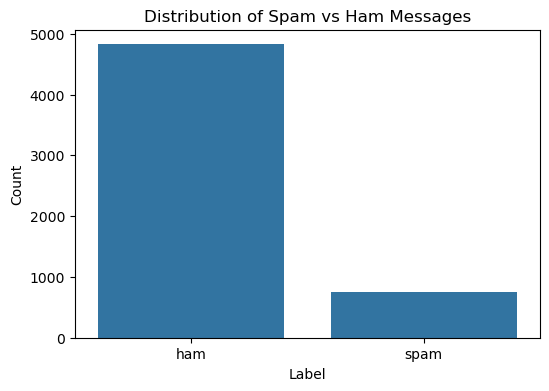

In [8]:
#  Visualize spam vs ham distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title("Distribution of Spam vs Ham Messages")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


In [9]:
# Character length of each message
df['char_length'] = df['message'].apply(len)

# Word count of each message
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

df[['label','message', 'char_length', 'word_count']].head()


,label,message,char_length,word_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13


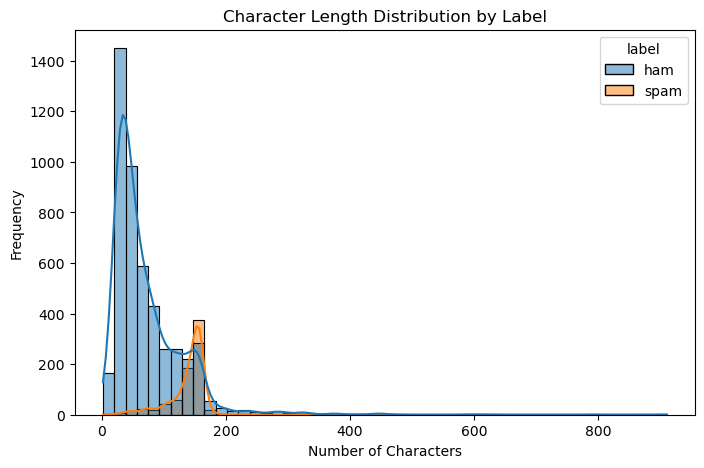

In [10]:
# visualize message length distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='char_length', hue='label', bins=50, kde=True)
plt.title("Character Length Distribution by Label")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()


In [11]:
# Average statistics by label
df.groupby('label')[['char_length', 'word_count']].mean()


,char_length,word_count
label,,
ham,71.482487,14.310259
spam,138.670683,23.911647


In [12]:
# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    """
    Perform text preprocessing:
    1. Lowercase
    2. Remove numbers
    3. Remove punctuation
    4. Tokenize
    5. Remove stopwords
    6. Stemming
    """
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize text
    tokens = text.split()
    
    # Remove stopwords and apply stemming
    tokens = [
        stemmer.stem(word)
        for word in tokens
        if word not in stop_words
    ]
    
    # Join tokens back into a single string
    return " ".join(tokens)


In [13]:
# Apply preprocessing
df['clean_message'] = df['message'].apply(preprocess_text)

# Display original vs cleaned text
df[['label', 'message', 'clean_message']].head()


,label,message,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


In [14]:
# Length after preprocessing
df['clean_word_count'] = df['clean_message'].apply(lambda x: len(x.split()))

df[['word_count', 'clean_word_count']].describe()


,word_count,clean_word_count
count,5572.000000,5572.000000
mean,15.597452,9.024408
std,11.404053,6.547956
min,1.000000,0.000000
25%,7.000000,4.000000
50%,12.000000,7.000000
75%,23.000000,13.000000
max,171.000000,80.000000


In [15]:
from collections import Counter

def get_top_words(text_series, n=20):
    """
    Return top n most common words from a pandas Series
    """
    all_words = " ".join(text_series).split()
    return Counter(all_words).most_common(n)


In [16]:
ham_words= get_top_words(df[df['label'] == 'ham']['clean_message'])
ham_words

[('u', 1001),
 ('im', 454),
 ('go', 419),
 ('get', 364),
 ('come', 295),
 ('call', 289),
 ('ltgt', 276),
 ('ok', 273),
 ('dont', 265),
 ('ur', 246),
 ('like', 244),
 ('know', 244),
 ('ill', 240),
 ('love', 239),
 ('got', 233),
 ('good', 225),
 ('time', 220),
 ('day', 220),
 ('want', 213),
 ('need', 176)]

In [17]:
spam_words= get_top_words(df[df['label'] == 'spam']['clean_message'])
spam_words

[('call', 368),
 ('£', 270),
 ('free', 219),
 ('txt', 163),
 ('u', 155),
 ('ur', 144),
 ('text', 139),
 ('mobil', 136),
 ('stop', 118),
 ('claim', 115),
 ('repli', 110),
 ('prize', 94),
 ('get', 87),
 ('tone', 73),
 ('nokia', 72),
 ('servic', 72),
 ('send', 70),
 ('p', 70),
 ('new', 69),
 ('award', 66)]

In [18]:
# Keep only useful columns for modeling
final_df = df[['label', 'clean_message']]

final_df.head()

# Save to CSV
OUTPUT_PATH = "E:\\Desktop\\02VC_Group_09\\datasets\\SMS_spam_collection\\sms_clean.csv"
final_df.to_csv(OUTPUT_PATH, index=False)

print(f"Clean dataset saved to {OUTPUT_PATH}")



Clean dataset saved to E:\Desktop\02VC_Group_09\datasets\SMS_spam_collection\sms_clean.csv


## EDA findings:
- Dataset is imbalanced (more ham than spam)
- Spam messages are longer on average
- Spam uses more call-to-action and promotional terms
## Preprocessing includes:
- Lowercasing
- Noise removal
- Stopword removal
- Stemming